In [145]:
import networkx as nx
from fa2 import ForceAtlas2
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import numpy as np
import pickle
import os
import seaborn as sns
from joblib import Parallel, delayed

In [429]:
# Read correlation list
in_dir = r'..\..\coculture_diagonal\primed_pbmc\00_analysis\networks\proximity'
corr_l = pd.read_pickle(os.path.join(in_dir,'networks','cd8','013_1.pkl'))

In [450]:
corr_l[39][0]

ACTb      CD45    COL1A1       IL6
ACTb    1.038516 -0.670653 -0.673476 -0.512518
CD45   -0.670653 -0.611343  0.491719 -0.616027
COL1A1 -0.673476  0.491719  0.399031  0.528063
IL6    -0.512518 -0.616027  0.528063  0.000000

In [432]:
# Read z-score list
z_in_dir = r'..\..\coculture_diagonal\primed_pbmc\00_analysis\networks\proximity\z_scores\cd8'
z_scores = pd.read_pickle(os.path.join(z_in_dir, '013_1.pkl'))

In [433]:
graph_0 = nx.Graph()
graph_0.add_nodes_from(corr_l[0][0].columns.tolist())

In [434]:
for item1 in corr_l[0][0].columns.tolist():
    for item2 in corr_l[0][0].columns.tolist():
        if abs(corr_l[0][0][item1][item2])>1:
            graph_0.add_edge(item1, item2, weight=corr_l[0][0][item1][item2])

In [435]:
pos = nx.spring_layout(graph_0)

In [436]:
z_scores = (z_scores - z_scores.min())+1

In [437]:
size_l = []
for item in corr_l[0][0].columns.tolist():
    size_l.append(z_scores.iloc[0][item]*500)

In [438]:
# node_colors = []
# for item in corr.columns.tolist():
#     if item=='CONA' or item=='WGA':
#         node_colors.append('#925e99dd')
#     else:
#         node_colors.append('#ffdc91')

In [440]:
set1_colors = pd.read_pickle('gene_set1_colors.pkl')
set2_colors = pd.read_pickle('gene_set2_colors.pkl')
set3_colors = pd.read_pickle('gene_set3_colors.pkl')
set4_colors = pd.read_pickle('gene_set4_colors.pkl')
node_colors = []
for item in corr_l[0][0].columns.tolist():
    node_colors.append(set1_colors[item])

In [441]:
edges,weights = zip(*nx.get_edge_attributes(graph_0,'weight').items())

In [442]:
len(graph_0.nodes)

6

In [443]:
cmap = sns.color_palette('vlag', as_cmap=True)

In [444]:
# forceatlas2 = ForceAtlas2(
#                         # Behavior alternatives
#                         outboundAttractionDistribution=False,  # Dissuade hubs
#                         linLogMode=False,  # NOT IMPLEMENTED
#                         adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
#                         edgeWeightInfluence=1,

#                         # Performance
#                         jitterTolerance=1.0,  # Tolerance
#                         barnesHutOptimize=True,
#                         barnesHutTheta=1.2,
#                         multiThreaded=False,  # NOT IMPLEMENTED

#                         # Tuning
#                         scalingRatio=1,
#                         strongGravityMode=True,
#                         gravity=0.0,

#                         # Log
#                         verbose=True)
# pos = forceatlas2.forceatlas2_networkx_layout(graph_0, pos=None, iterations=3)

In [445]:
pos = nx.shell_layout(graph_0)
for k in pos.keys():
    pos[k] = (pos[k][0]*1.2, pos[k][1]*1.2)

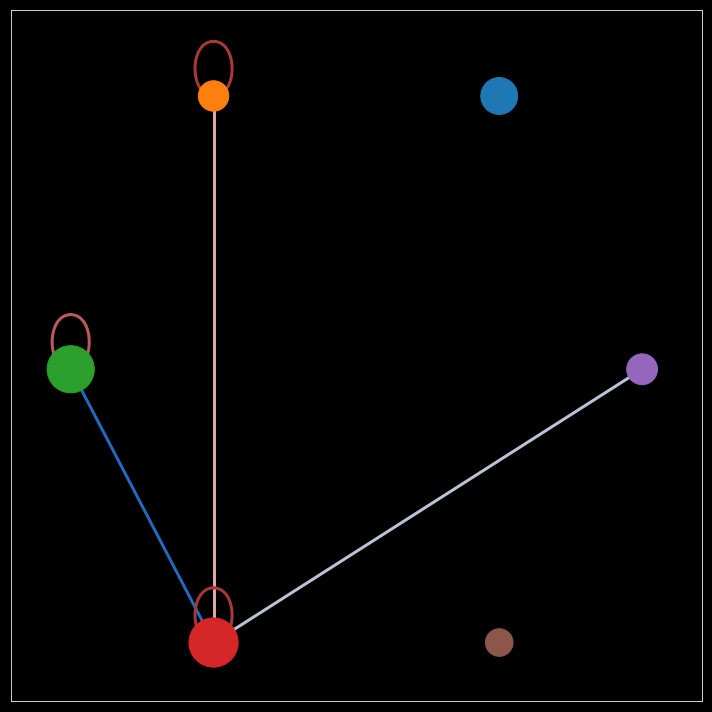

In [446]:
with rc_context({'figure.figsize': (10, 10), 'savefig.dpi': 600,'axes.facecolor': 'black', 'figure.facecolor': 'black'}):
    nx.draw_networkx(graph_0, pos = pos, width=3, with_labels=False,
                     node_size=size_l, node_color=node_colors, 
                     edge_color=weights, edge_cmap=cmap, edge_vmin=-3, edge_vmax=3,
                     font_weight='normal', font_size=12)
    plt.tight_layout()

In [447]:
out_dir = r'..\..\coculture_diagonal\primed_pbmc\00_analysis\networks\network_visuals\cd8\013_1'
os.makedirs(out_dir, exist_ok=True)
out_fn_l = os.listdir(out_dir)
out_fn_l.sort()
corr_fn_l = os.listdir(in_dir)
corr_fn_l.sort()
z_fn_l = os.listdir(z_in_dir)
z_fn_l.sort()

In [449]:
graph = nx.Graph()
cmap = sns.color_palette('vlag', as_cmap=True)
for i in range(len(corr_l)):
    corr = corr_l[i][0]
    # z_scores = pd.read_pickle(os.path.join(z_in_dir, z_fn_l[i]))
    cell_name = '013_1'
    
    if corr is None:
        continue
    graph.clear()

    # Add nodes
    graph.add_nodes_from(corr.columns.tolist())
    if len(graph.nodes) == 0:
        continue

    # Add edges
    for item1 in corr.columns.tolist():
        for item2 in corr.columns.tolist():
            if item1 != item2 and abs(corr[item1][item2])>1:
                graph.add_edge(item1, item2, weight=corr[item1][item2])
    if len(graph.edges) == 0:
        continue

    # Position of node
    pos = nx.shell_layout(graph)
    for k in pos.keys():
        pos[k] = pos[k] * 0.6

    # Size of nodes
    size_l = []
    for item in corr.columns.tolist():
        size_l.append(z_scores.iloc[i][item]*500)

    # Node colors
    node_colors = []
    # for item in corr.columns.tolist():
    #     if item=='CONA' or item=='WGA':
    #         node_colors.append('#925e99dd')
    #     else:
    #         node_colors.append('#ffdc91')
    for item in corr.columns.tolist():
        node_colors.append(set1_colors[item])

    # Edge colors
    edges,weights = zip(*nx.get_edge_attributes(graph,'weight').items())
    # cmap = sns.color_palette('vlag', as_cmap=True)
    
    with rc_context({'figure.figsize': (4, 3), 'savefig.dpi': 600,'axes.facecolor': 'black', 'figure.facecolor': 'black'}):
        nx.draw_networkx(graph, pos = pos, width=5, with_labels=False,
                        node_size=size_l, node_color=node_colors, 
                        edge_color=weights, edge_cmap=cmap, edge_vmin=-3, edge_vmax=3,
                        font_weight='normal', font_size=12)
    plt.tight_layout()
    plt.tight_layout()
    plt.savefig(os.path.join(out_dir,cell_name+'_'+str(i).zfill(2)+'.png'))
    plt.clf()

<Figure size 288x216 with 0 Axes>

In [253]:
z_scores.shape

(48, 6)

In [254]:
i

48

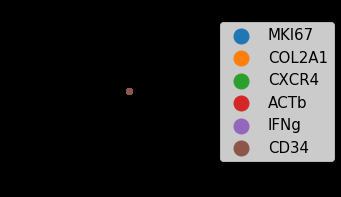

In [105]:

fig,ax = plt.subplots(1,1,figsize=(3,3))
fig.set_facecolor('black')
ax.set_facecolor('black')
for k in set4_colors:
    ax.scatter(0,0,c=set4_colors[k], label=k)
ax.legend(loc='center left',bbox_to_anchor=(1,0.5),ncol=1,fontsize=15,markerscale=2.5)
plt.show()
# plt.savefig(r'.\figures\set2_color_legene.png')

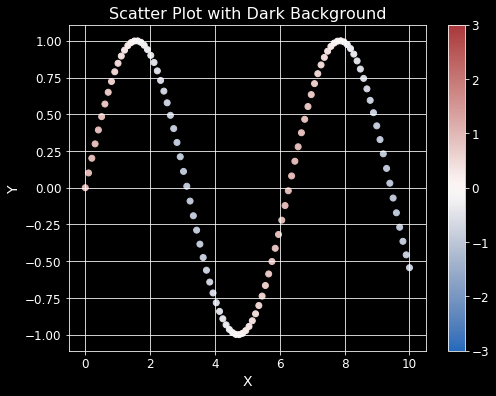

In [212]:
# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)
z = np.cos(x)

# Plot with dark background and larger font size
plt.figure(figsize=(8, 6))
plt.style.use('dark_background')  # Set dark background style

# Create scatter plot with colormap
sc = plt.scatter(x, y, c=z, cmap='vlag', vmin=-3, vmax=3)  # Set vmin and vmax

# Add colorbar with larger font size
cbar = plt.colorbar(sc)
cbar.set_label('', fontsize=14)  # Label for the colorbar with larger font size
cbar.ax.tick_params(labelsize=32)  # Set colorbar tick font size

# Set larger font size for axis labels and title
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('Scatter Plot with Dark Background', fontsize=16)

# Set larger font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)
plt.show()

# Visualie graph for all cells

In [ ]:
in_dir = r'Y:\coskun-lab\Zhou\4_HCR\20220211_MSC_hydrogel\00_analysis\spagnn\networks\proximity_scores\networks'
z_in_dir = r'Y:\coskun-lab\Zhou\4_HCR\20220211_MSC_hydrogel\00_analysis\spagnn\networks\proximity_scores\z_scores'
cell_l = os.listdir(in_dir)
cell_l.sort()

In [ ]:
out_dir = r'Y:\coskun-lab\Zhou\4_HCR\20220211_MSC_hydrogel\00_analysis\spagnn\networks\network_visuals'

In [ ]:
def plot_cell(cell, genes = [], with_labels=False, figsize=(10,10)):
    corr_l = pd.read_pickle(os.path.join(in_dir, cell))
    z_scores = pd.read_pickle(os.path.join(z_in_dir, cell))
    graph = nx.Graph()
    cmap = sns.color_palette('vlag', as_cmap=True)
    for i in range(len(corr_l)):
        corr = corr_l[i][0]
        # z_scores = pd.read_pickle(os.path.join(z_in_dir, z_fn_l[i]))
        os.makedirs(os.path.join(out_dir,cell.split('.')[0]), exist_ok=True)
        cell_name = cell.split('.')[0]
        
        if corr is None:
            continue
        graph.clear()

        # Add nodes
        nodes = []
        if len(genes) == 0:
            nodes = corr.columns.tolist()
        else:
            for gene in genes:
                if gene in corr.columns.tolist():
                    nodes.append(gene)
        graph.add_nodes_from(nodes)

        # Add edges
        for item1 in nodes:
            for item2 in nodes:
                if item1 != item2 and abs(corr[item1][item2])>1:
                    graph.add_edge(item1, item2, weight=corr[item1][item2])
        
        if not len(graph.edges) == 0:
            # Position of node
            pos = nx.shell_layout(graph)
            for k in pos.keys():
                pos[k] = pos[k]

            # Size of nodes
            size_l = []
            for item in nodes:
                size_l.append(z_scores.iloc[i][item])
            size_l = np.array(size_l)
            size_l = list(((size_l - size_l.min())+1)*200)

            # Node colors
            node_colors = []
            # for item in corr.columns.tolist():
            #         node_colors.append('#925e99dd')
            #     else:
            #         node_colors.append('#ffdc91')
            for item in nodes:
                node_colors.append(gene_color_dict[item])

            # Edge colors
            edges,weights = zip(*nx.get_edge_attributes(graph,'weight').items())
            # cmap = sns.color_palette('vlag', as_cmap=True)
            
            with rc_context({'figure.figsize': figsize, 'savefig.dpi': 600,'axes.facecolor': 'black', 'figure.facecolor': 'black'}):
                nx.draw_networkx(graph, pos = pos, width=5, with_labels=with_labels,
                                node_size=size_l, node_color=node_colors, 
                                edge_color=weights, edge_cmap=cmap, edge_vmin=-3, edge_vmax=3,
                                font_weight='bold', font_size=18, font_color='white')
            # plt.tight_layout()
            plt.savefig(os.path.join(out_dir,cell.split('.')[0],cell_name+'_'+str(i).zfill(2)+'.png'),bbox_inches='tight')
            plt.clf()

In [ ]:
_ = Parallel(n_jobs=-2)(delayed(plot_cell)(cell) for cell in cell_l)

# Selected genes

## GENE SET 1

In [3]:
genes = ['COL1A1','ACTb','COMP','COL5A2','IL8','CCL19','IL6','MKI67','CXCR4','COL2A1']

In [117]:
out_dir = r'Y:\coskun-lab\Zhou\4_HCR\20220211_MSC_hydrogel\00_analysis\spagnn\networks\network_visual_subset\homo_v_hetero_pairs'
# out_fn_l = os.listdir(out_dir)
# out_fn_l.sort()
# corr_fn_l = os.listdir(in_dir)
# corr_fn_l.sort()
# z_fn_l = os.listdir(z_in_dir)
# z_fn_l.sort()

In [149]:
plot_cell('bm_001_03.pkl', genes, with_labels=False, figsize=(5,4))

<Figure size 360x288 with 0 Axes>

In [150]:
_ = Parallel(n_jobs=-2, verbose = 100)(delayed(plot_cell)(cell, genes, with_labels=False, figsize=(5,4)) for cell in cell_l)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-2)]: Done   3 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-2)]: Done   5 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-2)]: Done   6 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-2)]: Done   7 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-2)]: Done   8 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-2)]: Done   9 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-2)]: Done  10 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-2)]: Done  12 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-2)]: Done  13 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-2)]: Done  14 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-2)]: Done  15 tasks      | elapsed:   

### plotting legend

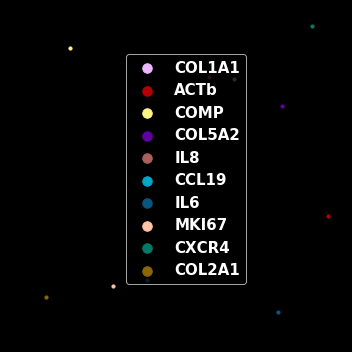

In [12]:
with rc_context({'figure.figsize': (5, 5), 'savefig.dpi': 600,'axes.facecolor': 'black', 'figure.facecolor': 'black'}):
    ax,fig = plt.subplots(1,1)
    for g in genes:
        x,y = np.random.rand(2)
        plt.scatter(x,y, label=g, c=gene_color_dict[g], s=10,)
    
    legend = plt.legend(bbox_to_anchor=(0.5,0.5), loc="center", fontsize=15, markerscale=3)
    for text in legend.get_texts():
        text.set_color('white')
        text.set_fontweight('bold')
    
    plt.tight_layout()
    # plt.show()
    plt.savefig(r'.\figures\gnn_gene_legend.png',bbox_inches='tight')

## GENE SET 2

In [22]:
genes = ['EEF2','IBSP','MKI67','CD90','SPP1','COL2A1','COL1A1','IL6','PDL1','COL5A2']

In [23]:
out_dir = r'Y:\coskun-lab\Zhou\4_HCR\20220211_MSC_hydrogel\00_analysis\spagnn\networks\network_visual_subset\homo_v_hetero_pairs_2'
# out_fn_l = os.listdir(out_dir)
# out_fn_l.sort()
# corr_fn_l = os.listdir(in_dir)
# corr_fn_l.sort()
# z_fn_l = os.listdir(z_in_dir)
# z_fn_l.sort()

In [24]:
plot_cell('bm_001_03.pkl', genes, with_labels=False, figsize=(5,4))

<Figure size 360x288 with 0 Axes>

In [25]:
_ = Parallel(n_jobs=-2, verbose = 100)(delayed(plot_cell)(cell, genes, with_labels=False, figsize=(5,4)) for cell in cell_l)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-2)]: Done   3 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-2)]: Done   5 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-2)]: Done   6 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-2)]: Done   7 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-2)]: Done   8 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-2)]: Done   9 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-2)]: Done  10 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-2)]: Done  12 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-2)]: Done  13 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-2)]: Done  14 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-2)]: Done  15 tasks      | elapsed:   

### plotting legend

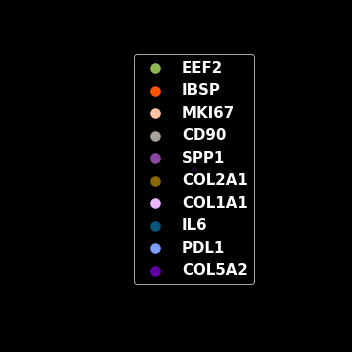

In [27]:
with rc_context({'figure.figsize': (5, 5), 'savefig.dpi': 600,'axes.facecolor': 'black', 'figure.facecolor': 'black'}):
    ax,fig = plt.subplots(1,1)
    for g in genes:
        x,y = np.random.rand(2)
        plt.scatter([0,0],[0,0], label=g, c=gene_color_dict[g], s=10,)
    
    legend = plt.legend(bbox_to_anchor=(0.5,0.5), loc="center", fontsize=15, markerscale=3)
    for text in legend.get_texts():
        text.set_color('white')
        text.set_fontweight('bold')
    
    plt.tight_layout()
    # plt.show()
    plt.savefig(r'.\figures\gnn_set2_gene_legend.png',bbox_inches='tight')

# Importance plots

#### important nodes and edges, uc002 3, 5

In [ ]:
uc_002_3_explanation = pd.read_pickle(r'.\results\explainer\uc_002_03.pkl')
uc_002_5_explanation = pd.read_pickle(r'.\results\explainer\uc_002_05.pkl')

In [ ]:
proxi_df = pd.read_csv(r'.\results\proxi_df.csv',index_col=0)
edges = pd.read_pickle(r'.\results\patch_connected_pairs.pkl')

In [ ]:
proxi_by_cell = proxi_df.groupby('cellID')

In [ ]:
uc_002_3_proxi = proxi_by_cell.get_group('uc_002_03')
uc_002_5_proxi = proxi_by_cell.get_group('uc_002_05')

In [ ]:
uc_002_3_edge_colors = uc_002_3_explanation['edge_mask']
uc_002_3_edge_colors = (uc_002_3_edge_colors - uc_002_3_edge_colors.min()) / (uc_002_3_edge_colors.max() - uc_002_3_edge_colors.min())

uc_002_3_node_colors = uc_002_3_explanation['node_mask']
uc_002_3_node_colors = np.abs(uc_002_3_node_colors)
uc_002_3_node_colors = np.sum(uc_002_3_node_colors,axis=1)
uc_002_3_node_colors = (uc_002_3_node_colors - uc_002_3_node_colors.min()) / (uc_002_3_node_colors.max() - uc_002_3_node_colors.min())


uc_002_5_edge_colors = uc_002_5_explanation['edge_mask']
uc_002_5_edge_colors = (uc_002_5_edge_colors - uc_002_5_edge_colors.min()) / (uc_002_5_edge_colors.max() - uc_002_5_edge_colors.min())

uc_002_5_node_colors = uc_002_5_explanation['node_mask']
uc_002_5_node_colors = np.abs(uc_002_5_node_colors)
uc_002_5_node_colors = np.sum(uc_002_5_node_colors,axis=1)
uc_002_5_node_colors = (uc_002_5_node_colors - uc_002_5_node_colors.min()) / (uc_002_5_node_colors.max() - uc_002_5_node_colors.min())

In [ ]:
fn_l = os.listdir(r'.\results\explainer')
fn_l.sort()

idx1 = fn_l.index('uc_002_03.pkl')
idx2 = fn_l.index('uc_002_05.pkl')

uc_002_3_filtered_edges = []
for item in edges[idx1]:
    if item[0] == item[1]:
        continue
    else:
        uc_002_3_filtered_edges.append(item)

uc_002_5_filtered_edges = []
for item in edges[idx2]:
    if item[0] == item[1]:
        continue
    else:
        uc_002_5_filtered_edges.append(item)

C:\Users\zfang38\AppData\Local\Temp\ipykernel_250292\4112609684.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


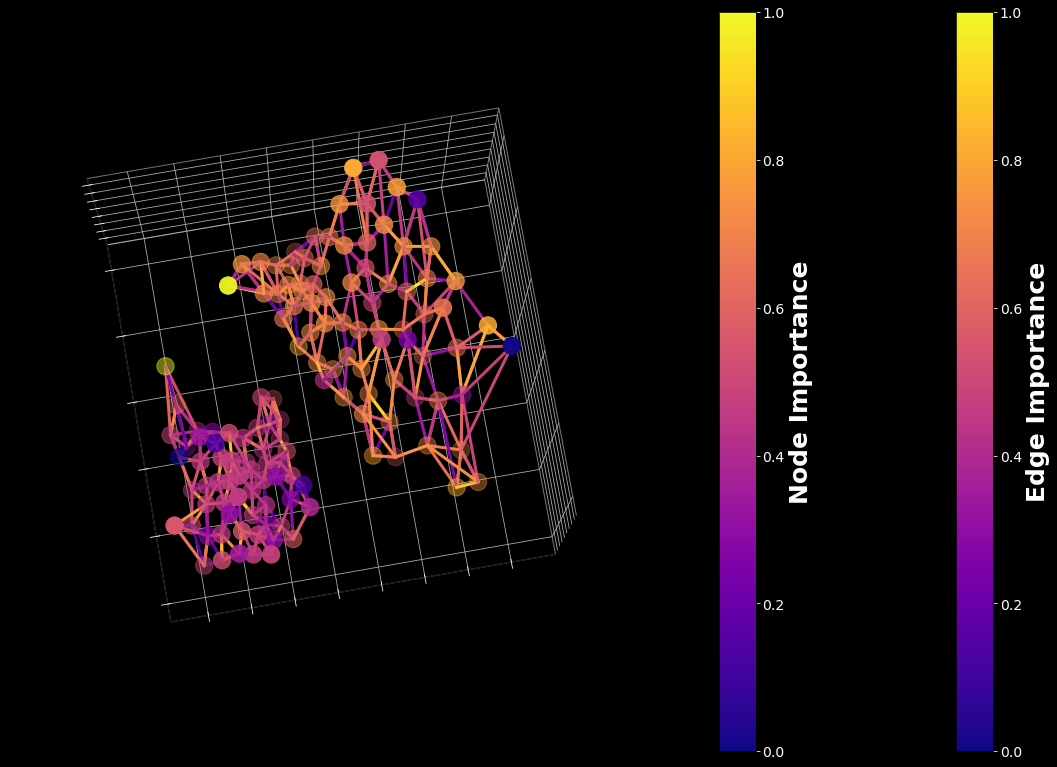

In [ ]:
with plt.rc_context({'text.color': 'white', 'axes.labelcolor': 'white', 'xtick.color': 'white', 'ytick.color': 'white'}):
    fig = plt.figure(figsize=(20,17))
    ax = fig.add_subplot(projection='3d')
    fig.set_facecolor('black')
    ax.set_facecolor('black')
    ax.w_xaxis.pane.fill = False
    ax.w_yaxis.pane.fill = False
    ax.w_zaxis.pane.fill = False
    ax.invert_zaxis()

    node_cmap = plt.cm.plasma

    node_c = node_cmap(uc_002_3_node_colors)
    ax.scatter(uc_002_3_proxi['row']*scale, uc_002_3_proxi['col']*scale, uc_002_3_proxi['z']*z_scale, '.', c=node_c, s=300)
    
    node_c = node_cmap(uc_002_5_node_colors)
    ax.scatter(uc_002_5_proxi['row']*scale, uc_002_5_proxi['col']*scale, uc_002_5_proxi['z']*z_scale, '.', c=node_c, s=300)
    # ax.plot(edge_row*scale, edge_col*scale, edge_z*scale, color='r')

    edge_cmap = plt.cm.plasma
    for i in range(len(uc_002_3_filtered_edges)):
        item = uc_002_3_filtered_edges[i]
        edge_c = edge_cmap(uc_002_3_edge_colors[i])
        ax.plot([uc_002_3_proxi.loc[item[0]]['row'].astype('float')*scale, uc_002_3_proxi.loc[item[1]]['row'].astype('float')*scale],
                [uc_002_3_proxi.loc[item[0]]['col'].astype('float')*scale, uc_002_3_proxi.loc[item[1]]['col'].astype('float')*scale],
                [uc_002_3_proxi.loc[item[0]]['z'].astype('float')*z_scale, uc_002_3_proxi.loc[item[1]]['z'].astype('float')*z_scale],
                c=edge_c,linewidth=3)
    
    for i in range(len(uc_002_5_filtered_edges)):
        item = uc_002_5_filtered_edges[i]
        edge_c = edge_cmap(uc_002_5_edge_colors[i])
        ax.plot([uc_002_5_proxi.loc[item[0]]['row'].astype('float')*scale, uc_002_5_proxi.loc[item[1]]['row'].astype('float')*scale],
                [uc_002_5_proxi.loc[item[0]]['col'].astype('float')*scale, uc_002_5_proxi.loc[item[1]]['col'].astype('float')*scale],
                [uc_002_5_proxi.loc[item[0]]['z'].astype('float')*z_scale, uc_002_5_proxi.loc[item[1]]['z'].astype('float')*z_scale],
                c=edge_c,linewidth=3)
    
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    
    edge_mappable = plt.cm.ScalarMappable(cmap=edge_cmap)
    edge_cb = plt.colorbar(edge_mappable, ax=ax, label='Edge Importance', pad=0.1, shrink=0.8)
    edge_cb.ax.yaxis.set_tick_params(labelsize=14, color='white')
    edge_cb.set_label('Edge Importance', color='white', weight='bold', fontsize=25)

    node_mappable = plt.cm.ScalarMappable(cmap=node_cmap)
    node_cb = plt.colorbar(node_mappable, ax=ax, label='Node Importance', pad=0.1, shrink=0.8)
    node_cb.ax.yaxis.set_tick_params(labelsize=14, color='white')
    node_cb.set_label('Node Importance', color='white', weight='bold', fontsize=25)

    ax.view_init(-100, 100)
    plt.tight_layout()
    plt.savefig(r'.\figures\uc_002_02_05_graph_importance.png')

#### neighboring patches networks, uc_002_03 and uc_002_05

In [ ]:
uc_002_3 = embedding[embedding['cellID']=='uc_002_03']
uc_002_5 = embedding[embedding['cellID']=='uc_002_05']
uc_002_patches = pd.concat([uc_002_3,uc_002_5])

In [ ]:
mask = tifffile.imread(r'Y:\coskun-lab\Zhou\4_HCR\20220211_MSC_hydrogel\00_segmentation\cellpose\combined_rna\uc_rgb_combined\masks\002_mask.tif')
mask = (mask==3).astype('int') + (mask==5).astype('int')

dapi_mip = tifffile.imread(r'Y:\coskun-lab\Zhou\4_HCR\20220211_MSC_hydrogel\00_segmentation\cellpose\combined_rna\uc_rgb_combined\imgs\002_image.tif')
dapi_mip = dapi_mip[2,:,:]

masked_dapi = mask * dapi_mip
thre = threshold_otsu(masked_dapi)
dapi_mask = masked_dapi > thre

dapi_coor = np.where(dapi_mask)
dapi_row = dapi_coor[0].astype('float') * scale
dapi_col = dapi_coor[1].astype('float') * scale

dapi_z = 12 * z_scale

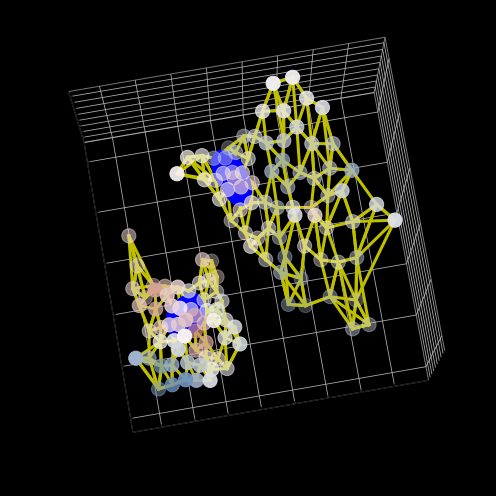

In [ ]:

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.invert_zaxis()

ax.scatter(dapi_row,dapi_col,dapi_z,color='b',s=1)
ax.scatter(uc_002_patches['row']*scale,uc_002_patches['col']*scale,uc_002_patches['z']*z_scale,s=200,
           c = uc_002_patches['24'],cmap='vlag',vmin=-0.5,vmax=0.5)

for i in range(len(uc_002_3_filtered_edges)):
    item = uc_002_3_filtered_edges[i]
    edge_c = edge_cmap(uc_002_3_edge_colors[i])
    ax.plot([uc_002_3_proxi.loc[item[0]]['row'].astype('float')*scale, uc_002_3_proxi.loc[item[1]]['row'].astype('float')*scale],
            [uc_002_3_proxi.loc[item[0]]['col'].astype('float')*scale, uc_002_3_proxi.loc[item[1]]['col'].astype('float')*scale],
            [uc_002_3_proxi.loc[item[0]]['z'].astype('float')*z_scale, uc_002_3_proxi.loc[item[1]]['z'].astype('float')*z_scale],
            color='y',linewidth=3)

for i in range(len(uc_002_5_filtered_edges)):
    item = uc_002_5_filtered_edges[i]
    edge_c = edge_cmap(uc_002_5_edge_colors[i])
    ax.plot([uc_002_5_proxi.loc[item[0]]['row'].astype('float')*scale, uc_002_5_proxi.loc[item[1]]['row'].astype('float')*scale],
            [uc_002_5_proxi.loc[item[0]]['col'].astype('float')*scale, uc_002_5_proxi.loc[item[1]]['col'].astype('float')*scale],
            [uc_002_5_proxi.loc[item[0]]['z'].astype('float')*z_scale, uc_002_5_proxi.loc[item[1]]['z'].astype('float')*z_scale],
            color='y',linewidth=3)

ax.view_init(-100, 100)
plt.tight_layout()
plt.savefig(r'.\figures\uc_002_02-05_embedding_24_interactions.png')

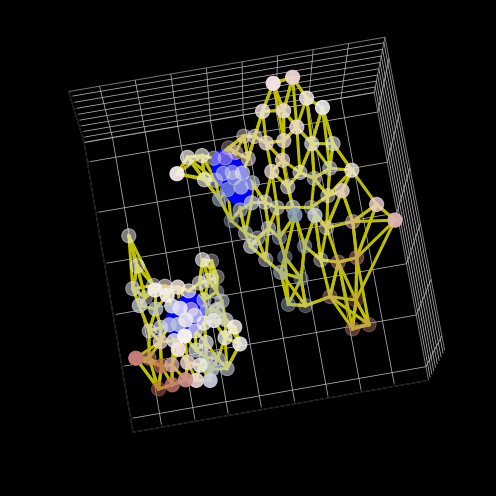

In [ ]:

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.invert_zaxis()

ax.scatter(dapi_row,dapi_col,dapi_z,color='b',s=1)
ax.scatter(uc_002_patches['row']*scale,uc_002_patches['col']*scale,uc_002_patches['z']*z_scale,s=200,
           c = uc_002_patches['59'],cmap='vlag',vmin=-0.5,vmax=0.5)

for i in range(len(uc_002_3_filtered_edges)):
    item = uc_002_3_filtered_edges[i]
    edge_c = edge_cmap(uc_002_3_edge_colors[i])
    ax.plot([uc_002_3_proxi.loc[item[0]]['row'].astype('float')*scale, uc_002_3_proxi.loc[item[1]]['row'].astype('float')*scale],
            [uc_002_3_proxi.loc[item[0]]['col'].astype('float')*scale, uc_002_3_proxi.loc[item[1]]['col'].astype('float')*scale],
            [uc_002_3_proxi.loc[item[0]]['z'].astype('float')*z_scale, uc_002_3_proxi.loc[item[1]]['z'].astype('float')*z_scale],
            color='y',linewidth=3)

for i in range(len(uc_002_5_filtered_edges)):
    item = uc_002_5_filtered_edges[i]
    edge_c = edge_cmap(uc_002_5_edge_colors[i])
    ax.plot([uc_002_5_proxi.loc[item[0]]['row'].astype('float')*scale, uc_002_5_proxi.loc[item[1]]['row'].astype('float')*scale],
            [uc_002_5_proxi.loc[item[0]]['col'].astype('float')*scale, uc_002_5_proxi.loc[item[1]]['col'].astype('float')*scale],
            [uc_002_5_proxi.loc[item[0]]['z'].astype('float')*z_scale, uc_002_5_proxi.loc[item[1]]['z'].astype('float')*z_scale],
            color='y',linewidth=3)

ax.view_init(-100, 100)
plt.tight_layout()
plt.savefig(r'.\figures\uc_002_03-05_embedding_59_interactions.png')

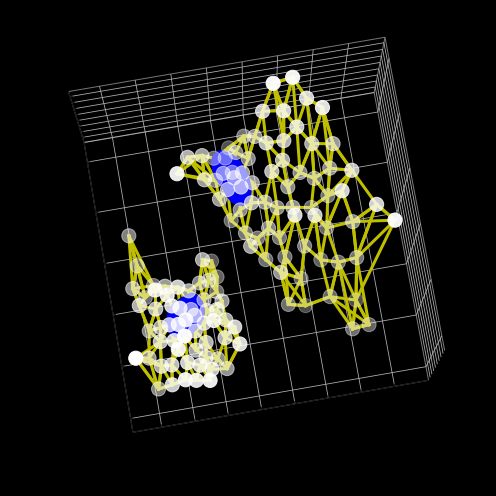

In [ ]:

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.invert_zaxis()

ax.scatter(dapi_row,dapi_col,dapi_z,color='b',s=1,alpha=0.1)
ax.scatter(uc_002_patches['row']*scale,uc_002_patches['col']*scale,uc_002_patches['z']*z_scale,s=200,
           color='w')

for i in range(len(uc_002_3_filtered_edges)):
    item = uc_002_3_filtered_edges[i]
    edge_c = edge_cmap(uc_002_3_edge_colors[i])
    ax.plot([uc_002_3_proxi.loc[item[0]]['row'].astype('float')*scale, uc_002_3_proxi.loc[item[1]]['row'].astype('float')*scale],
            [uc_002_3_proxi.loc[item[0]]['col'].astype('float')*scale, uc_002_3_proxi.loc[item[1]]['col'].astype('float')*scale],
            [uc_002_3_proxi.loc[item[0]]['z'].astype('float')*z_scale, uc_002_3_proxi.loc[item[1]]['z'].astype('float')*z_scale],
            color='y',linewidth=3)

for i in range(len(uc_002_5_filtered_edges)):
    item = uc_002_5_filtered_edges[i]
    edge_c = edge_cmap(uc_002_5_edge_colors[i])
    ax.plot([uc_002_5_proxi.loc[item[0]]['row'].astype('float')*scale, uc_002_5_proxi.loc[item[1]]['row'].astype('float')*scale],
            [uc_002_5_proxi.loc[item[0]]['col'].astype('float')*scale, uc_002_5_proxi.loc[item[1]]['col'].astype('float')*scale],
            [uc_002_5_proxi.loc[item[0]]['z'].astype('float')*z_scale, uc_002_5_proxi.loc[item[1]]['z'].astype('float')*z_scale],
            color='y',linewidth=3)

ax.view_init(-100, 100)
plt.tight_layout()
plt.savefig(r'.\figures\uc_002_03-05_patch_networks.png')

In [ ]:
patch_labels = []
uc_002_3_patches = uc_002_patches[uc_002_patches['cellID']=='uc_002_03']
for item in uc_002_3_patches.index.tolist():
    patch_labels.append(item.split('_')[-1])

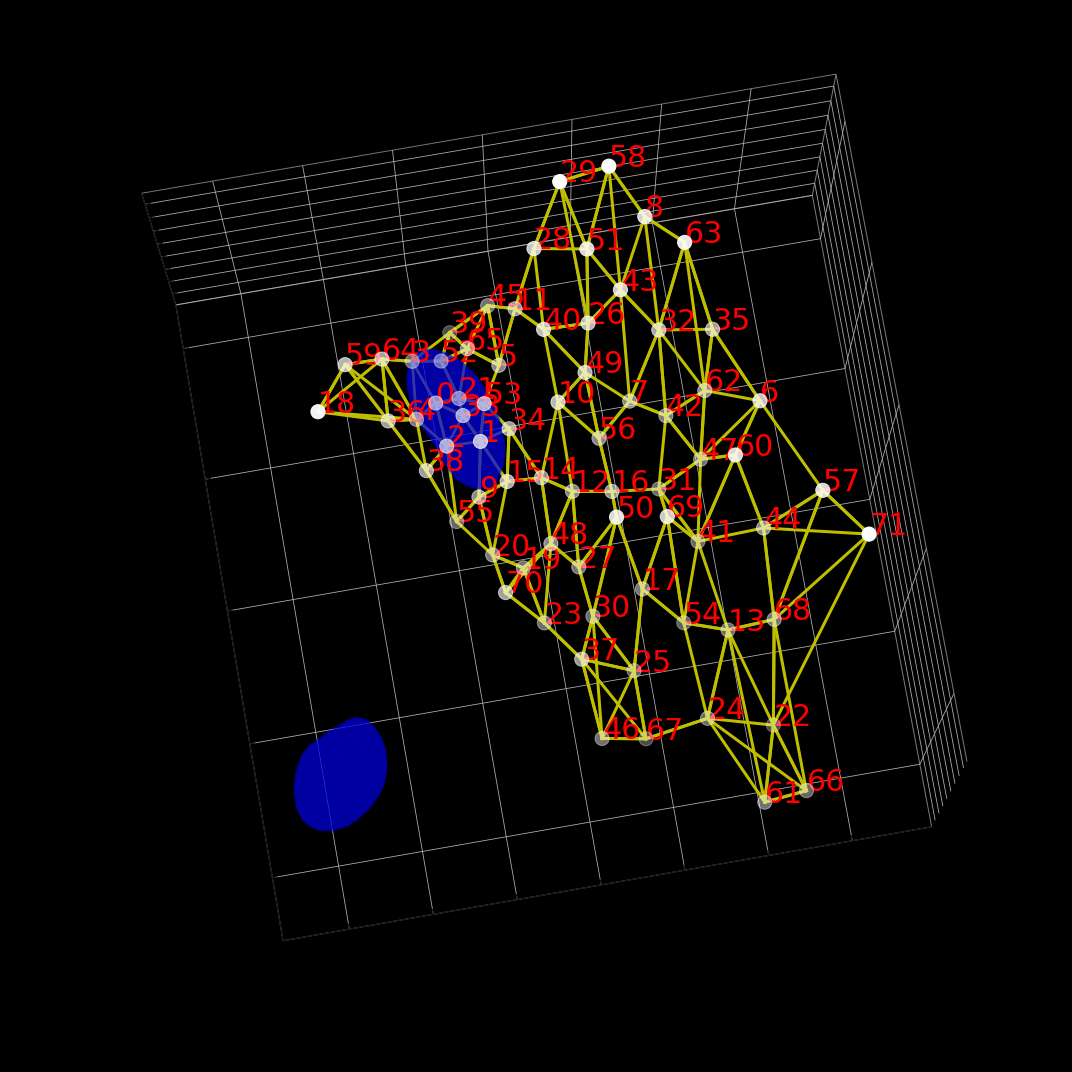

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.invert_zaxis()

ax.scatter(dapi_row,dapi_col,dapi_z,color='b',s=1,alpha=0.1)
uc_002_3_patches = uc_002_patches[uc_002_patches['cellID']=='uc_002_03']
ax.scatter(uc_002_3_patches['row']*scale,uc_002_3_patches['col']*scale,uc_002_3_patches['z']*z_scale,s=200,
           color='w')

for i in range(len(uc_002_3_filtered_edges)):
    item = uc_002_3_filtered_edges[i]
    edge_c = edge_cmap(uc_002_3_edge_colors[i])
    ax.plot([uc_002_3_proxi.loc[item[0]]['row'].astype('float')*scale, uc_002_3_proxi.loc[item[1]]['row'].astype('float')*scale],
            [uc_002_3_proxi.loc[item[0]]['col'].astype('float')*scale, uc_002_3_proxi.loc[item[1]]['col'].astype('float')*scale],
            [uc_002_3_proxi.loc[item[0]]['z'].astype('float')*z_scale, uc_002_3_proxi.loc[item[1]]['z'].astype('float')*z_scale],
            color='y',linewidth=3)

for idx in uc_002_3_patches.index.tolist():
    ax.text(uc_002_3_patches.loc[idx]['row']*scale,
            uc_002_3_patches.loc[idx]['col']*scale,
            uc_002_3_patches.loc[idx]['z']*z_scale,
            idx.split('_')[-1],color='r',fontsize=30)
ax.view_init(-100, 100)
plt.tight_layout()
# plt.savefig(r'.\figures\uc_003_01_patches_with_label.png')

In [ ]:
patch_labels = []
uc_002_5_patches = uc_002_patches[uc_002_patches['cellID']=='uc_002_05']
for item in uc_002_5_patches.index.tolist():
    patch_labels.append(item.split('_')[-1])

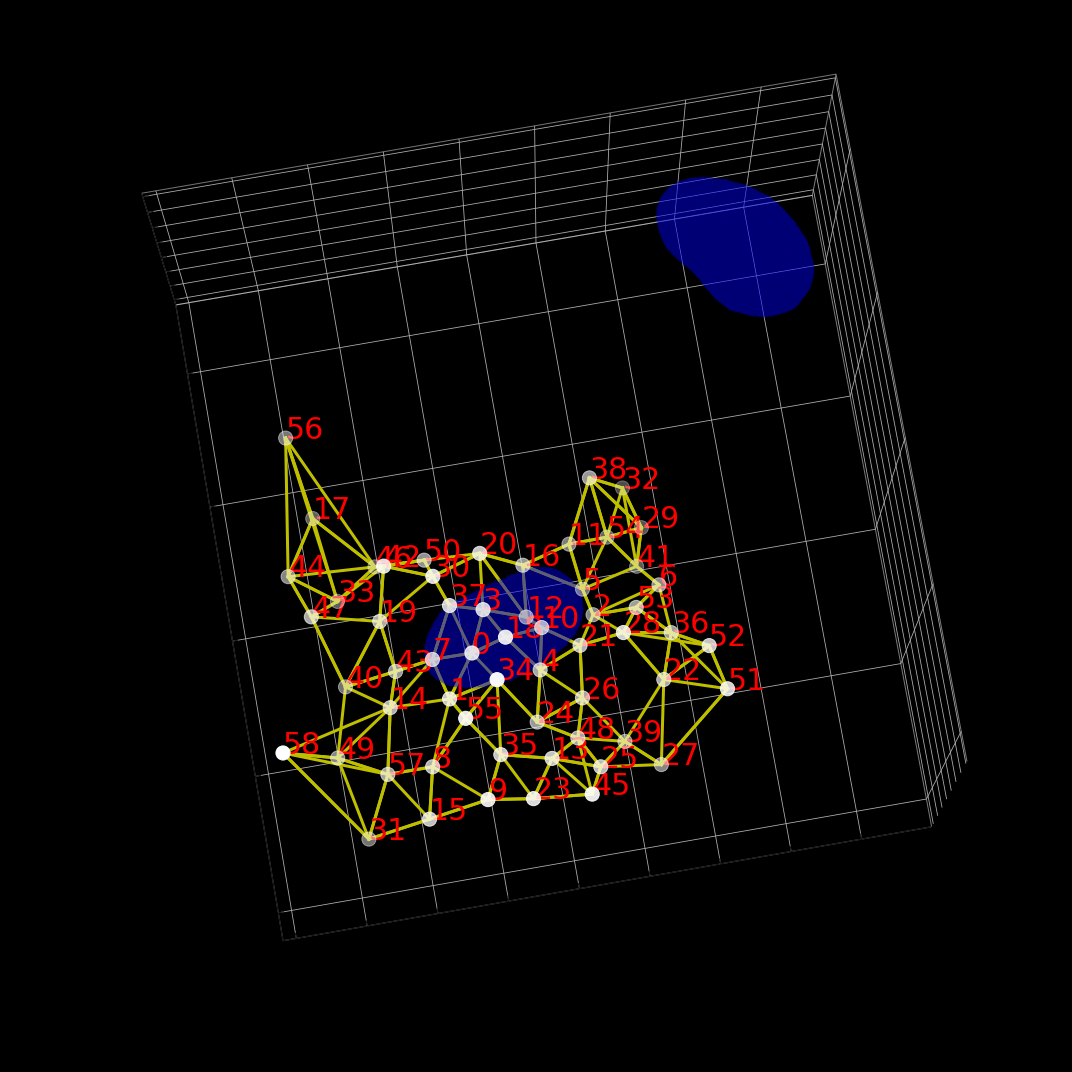

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.invert_zaxis()

ax.scatter(dapi_row,dapi_col,dapi_z,color='b',s=1,alpha=0.1)
uc_002_5_patches = uc_002_patches[uc_002_patches['cellID']=='uc_002_05']
ax.scatter(uc_002_5_patches['row']*scale,uc_002_5_patches['col']*scale,uc_002_5_patches['z']*z_scale,s=200,
           color='w')

for i in range(len(uc_002_5_filtered_edges)):
    item = uc_002_5_filtered_edges[i]
    edge_c = edge_cmap(uc_002_5_edge_colors[i])
    ax.plot([uc_002_5_proxi.loc[item[0]]['row'].astype('float')*scale, uc_002_5_proxi.loc[item[1]]['row'].astype('float')*scale],
            [uc_002_5_proxi.loc[item[0]]['col'].astype('float')*scale, uc_002_5_proxi.loc[item[1]]['col'].astype('float')*scale],
            [uc_002_5_proxi.loc[item[0]]['z'].astype('float')*z_scale, uc_002_5_proxi.loc[item[1]]['z'].astype('float')*z_scale],
            color='y',linewidth=3)

for idx in uc_002_5_patches.index.tolist():
    ax.text(uc_002_5_patches.loc[idx]['row']*scale,
            uc_002_5_patches.loc[idx]['col']*scale,
            uc_002_5_patches.loc[idx]['z']*z_scale,
            idx.split('_')[-1],color='r',fontsize=30)
ax.view_init(-100, 100)
plt.tight_layout()
# plt.savefig(r'.\figures\uc_003_01_patches_with_label.png')

In [ ]:
uc002_3_boarder = [38,55,20,70,19,23,27,48,14,15,1]
uc002_5_boarder = [38,32,29,54,11,41,6,53,28,2,5]

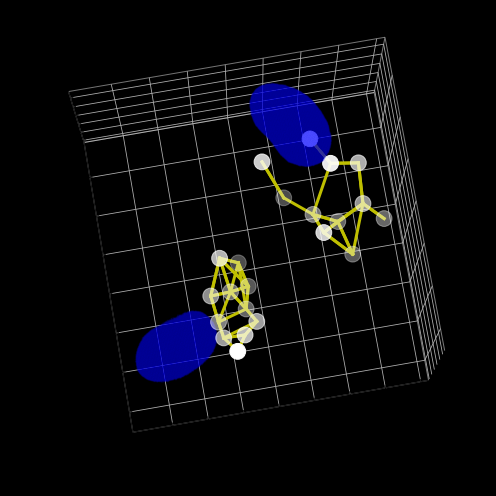

In [ ]:
# Plot boarder patches
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.invert_zaxis()

ax.scatter(dapi_row,dapi_col,dapi_z,color='b',s=1,alpha=0.05)

uc_002_3_patches = uc_002_patches[uc_002_patches['cellID']=='uc_002_03']
boarder_index = []
for p in uc002_3_boarder:
    boarder_index.append('uc_002_03_'+str(p))
uc_002_3_patches = uc_002_3_patches.loc[boarder_index]
ax.scatter(uc_002_3_patches['row']*scale,uc_002_3_patches['col']*scale,uc_002_3_patches['z']*z_scale,s=250,
           color='w')

uc_002_5_patches = uc_002_patches[uc_002_patches['cellID']=='uc_002_05']
boarder_index = []
for p in uc002_5_boarder:
    boarder_index.append('uc_002_05_'+str(p))
uc_002_5_patches = uc_002_5_patches.loc[boarder_index]
ax.scatter(uc_002_5_patches['row']*scale,uc_002_5_patches['col']*scale,uc_002_5_patches['z']*z_scale,s=250,
           color='w')


for edge in uc_002_3_filtered_edges:
    patch1 = uc_002_3_proxi.loc[edge[0]]['patch_name']
    patch2 = uc_002_3_proxi.loc[edge[1]]['patch_name']
    if patch1 in uc_002_3_patches.index.tolist() and patch2 in uc_002_3_patches.index.tolist():
        ax.plot([uc_002_3_proxi.loc[edge[0]]['row'].astype('float')*scale, uc_002_3_proxi.loc[edge[1]]['row'].astype('float')*scale],
                [uc_002_3_proxi.loc[edge[0]]['col'].astype('float')*scale, uc_002_3_proxi.loc[edge[1]]['col'].astype('float')*scale],
                [uc_002_3_proxi.loc[edge[0]]['z'].astype('float')*z_scale, uc_002_3_proxi.loc[edge[1]]['z'].astype('float')*z_scale],
                color='y',linewidth=3)

for edge in uc_002_5_filtered_edges:
    patch1 = uc_002_5_proxi.loc[edge[0]]['patch_name']
    patch2 = uc_002_5_proxi.loc[edge[1]]['patch_name']
    if patch1 in uc_002_5_patches.index.tolist() and patch2 in uc_002_5_patches.index.tolist():
        ax.plot([uc_002_5_proxi.loc[edge[0]]['row'].astype('float')*scale, uc_002_5_proxi.loc[edge[1]]['row'].astype('float')*scale],
                [uc_002_5_proxi.loc[edge[0]]['col'].astype('float')*scale, uc_002_5_proxi.loc[edge[1]]['col'].astype('float')*scale],
                [uc_002_5_proxi.loc[edge[0]]['z'].astype('float')*z_scale, uc_002_5_proxi.loc[edge[1]]['z'].astype('float')*z_scale],
                color='y',linewidth=3)

ax.view_init(-100, 100)
plt.tight_layout()

plt.savefig(r'.\figures\uc_002_03-05_boarder_patches.png')

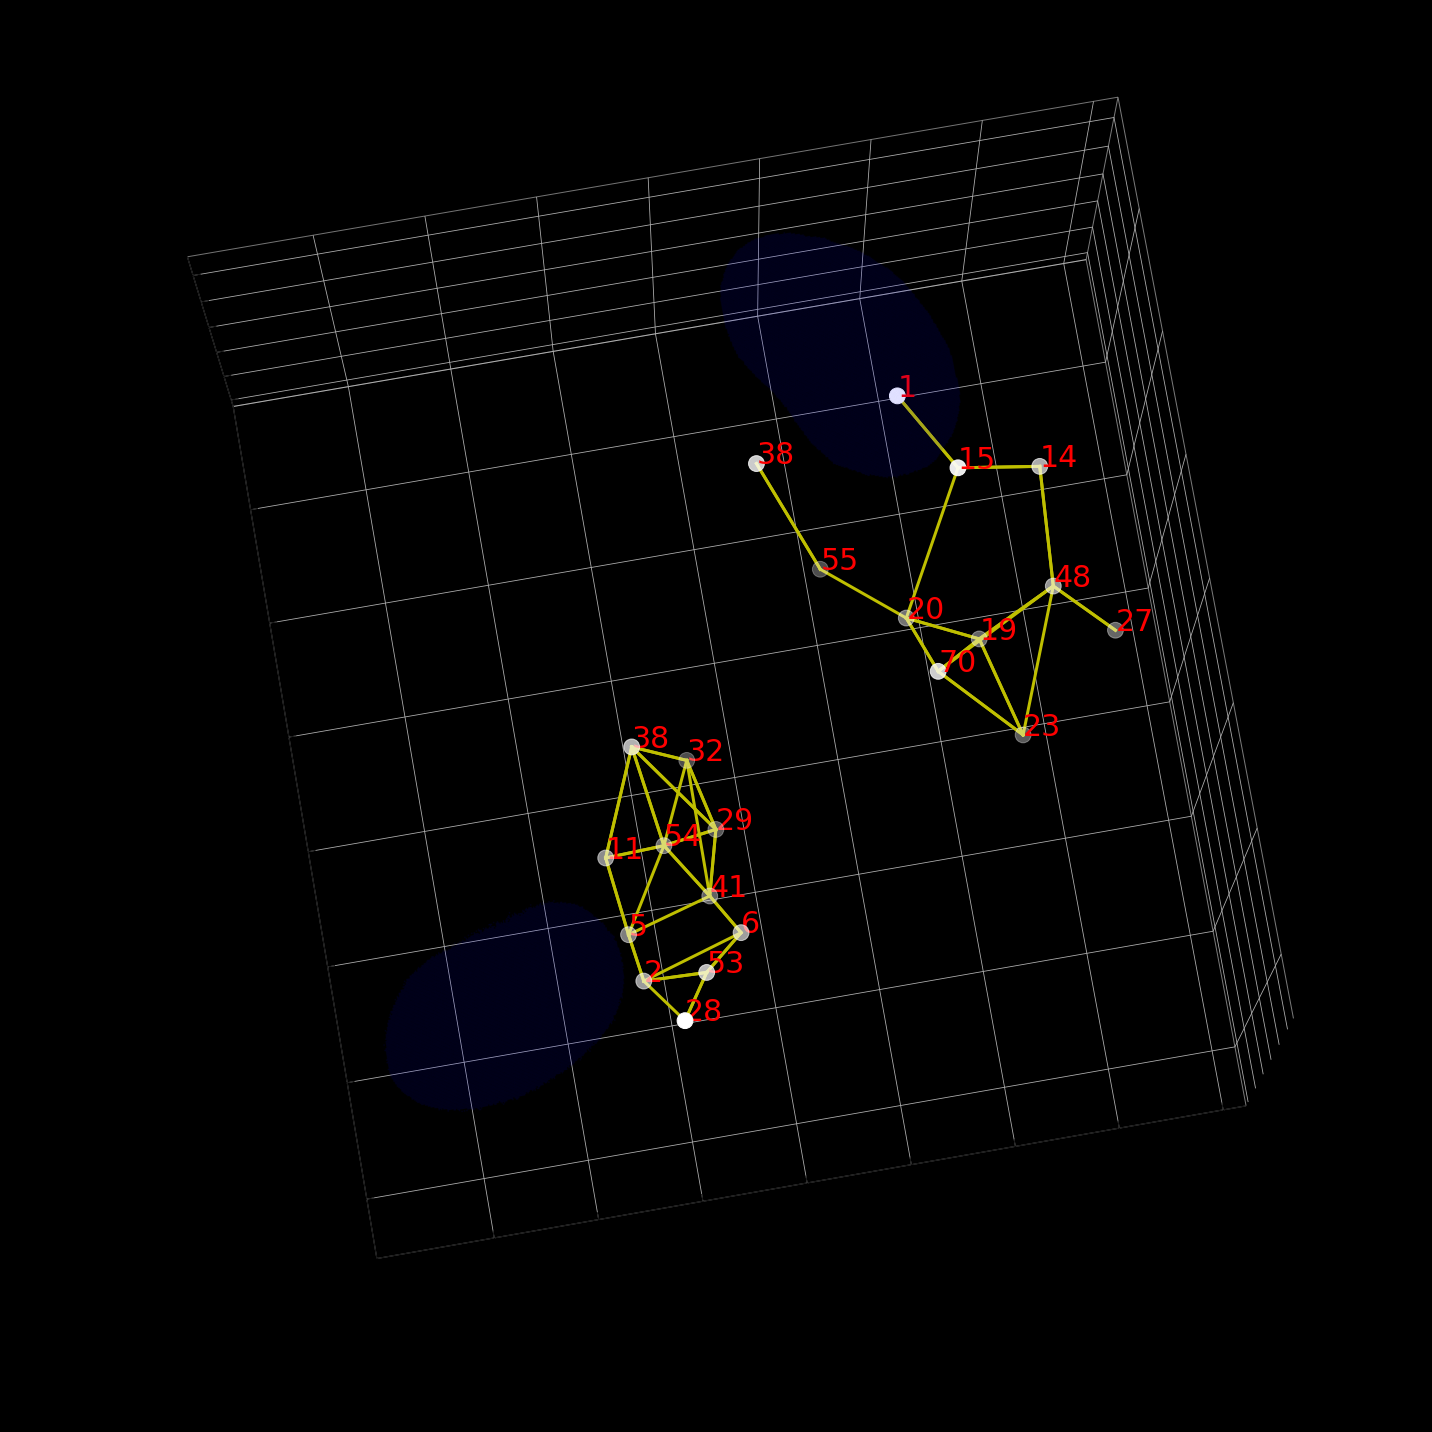

In [ ]:
# Plot boarder patches
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.invert_zaxis()

ax.scatter(dapi_row,dapi_col,dapi_z,color='b',s=1,alpha=0.05)

uc_002_3_patches = uc_002_patches[uc_002_patches['cellID']=='uc_002_03']
boarder_index = []
for p in uc002_3_boarder:
    boarder_index.append('uc_002_03_'+str(p))
uc_002_3_patches = uc_002_3_patches.loc[boarder_index]
ax.scatter(uc_002_3_patches['row']*scale,uc_002_3_patches['col']*scale,uc_002_3_patches['z']*z_scale,s=250,
           color='w')

uc_002_5_patches = uc_002_patches[uc_002_patches['cellID']=='uc_002_05']
boarder_index = []
for p in uc002_5_boarder:
    boarder_index.append('uc_002_05_'+str(p))
uc_002_5_patches = uc_002_5_patches.loc[boarder_index]
ax.scatter(uc_002_5_patches['row']*scale,uc_002_5_patches['col']*scale,uc_002_5_patches['z']*z_scale,s=250,
           color='w')


for edge in uc_002_3_filtered_edges:
    patch1 = uc_002_3_proxi.loc[edge[0]]['patch_name']
    patch2 = uc_002_3_proxi.loc[edge[1]]['patch_name']
    if patch1 in uc_002_3_patches.index.tolist() and patch2 in uc_002_3_patches.index.tolist():
        ax.plot([uc_002_3_proxi.loc[edge[0]]['row'].astype('float')*scale, uc_002_3_proxi.loc[edge[1]]['row'].astype('float')*scale],
                [uc_002_3_proxi.loc[edge[0]]['col'].astype('float')*scale, uc_002_3_proxi.loc[edge[1]]['col'].astype('float')*scale],
                [uc_002_3_proxi.loc[edge[0]]['z'].astype('float')*z_scale, uc_002_3_proxi.loc[edge[1]]['z'].astype('float')*z_scale],
                color='y',linewidth=3)

for edge in uc_002_5_filtered_edges:
    patch1 = uc_002_5_proxi.loc[edge[0]]['patch_name']
    patch2 = uc_002_5_proxi.loc[edge[1]]['patch_name']
    if patch1 in uc_002_5_patches.index.tolist() and patch2 in uc_002_5_patches.index.tolist():
        ax.plot([uc_002_5_proxi.loc[edge[0]]['row'].astype('float')*scale, uc_002_5_proxi.loc[edge[1]]['row'].astype('float')*scale],
                [uc_002_5_proxi.loc[edge[0]]['col'].astype('float')*scale, uc_002_5_proxi.loc[edge[1]]['col'].astype('float')*scale],
                [uc_002_5_proxi.loc[edge[0]]['z'].astype('float')*z_scale, uc_002_5_proxi.loc[edge[1]]['z'].astype('float')*z_scale],
                color='y',linewidth=3)



for idx in uc_002_3_patches.index.tolist():
    ax.text(uc_002_3_patches.loc[idx]['row']*scale,
            uc_002_3_patches.loc[idx]['col']*scale,
            uc_002_3_patches.loc[idx]['z']*z_scale,
            idx.split('_')[-1],color='r',fontsize=30)

for idx in uc_002_5_patches.index.tolist():
    ax.text(uc_002_5_patches.loc[idx]['row']*scale,
            uc_002_5_patches.loc[idx]['col']*scale,
            uc_002_5_patches.loc[idx]['z']*z_scale,
            idx.split('_')[-1],color='r',fontsize=30)

ax.view_init(-100, 100)
plt.tight_layout()

# plt.savefig(r'.\figures\uc_003_01-03_boarder_patches.png')

In [162]:
graph = nx.Graph()
cmap = sns.color_palette('vlag', as_cmap=True)
for i in range(len(corr_l)):
    corr = corr_l[i][0]
    # z_scores = pd.read_pickle(os.path.join(z_in_dir, z_fn_l[i]))
    cell_name = 'uc_003_01'
    
    if corr is None:
        continue
    graph.clear()

    # Add nodes
    nodes = []
    for gene in genes:
        if gene in corr.columns.tolist():
            nodes.append(gene)
    graph.add_nodes_from(nodes)

    # Add edges
    for item1 in nodes:
        for item2 in nodes:
            if item1 != item2 and abs(corr[item1][item2])>1:
                graph.add_edge(item1, item2, weight=corr[item1][item2])

    # Position of node
    pos = nx.shell_layout(graph)
    for k in pos.keys():
        pos[k] = pos[k] * 0.6

    # Size of nodes
    size_l = []
    for item in nodes:
        size_l.append(z_scores.iloc[i][item]*500)

    # Node colors
    node_colors = []
    # for item in corr.columns.tolist():
    #     if item=='CONA' or item=='WGA':
    #         node_colors.append('#925e99dd')
    #     else:
    #         node_colors.append('#ffdc91')
    for item in nodes:
        node_colors.append(gene_color_dict[item])

    # Edge colors
    edges,weights = zip(*nx.get_edge_attributes(graph,'weight').items())
    # cmap = sns.color_palette('vlag', as_cmap=True)
    
    with rc_context({'figure.figsize': (7, 6), 'savefig.dpi': 600,'axes.facecolor': 'black', 'figure.facecolor': 'black'}):
        
        nx.draw_networkx(graph, pos = pos, width=7, with_labels=True,
                        node_size=size_l, node_color=node_colors, 
                        edge_color=weights, edge_cmap=cmap, edge_vmin=-3, edge_vmax=3,
                        font_weight='bold', font_size=18, font_color='white')
    plt.tight_layout()
    plt.tight_layout()
    plt.savefig(os.path.join(out_dir,cell_name+'_'+str(i).zfill(2)+'_homo_v_hetero.png'))
    plt.clf()

c:\Users\zfang38\Anaconda3\envs\network\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 504x432 with 0 Axes>

## Network subunit visualization of patch 3, 6, and 20

In [18]:
cols_list = []
for item in corr_l:
    cols_list.append(item.columns.tolist())

In [19]:
common_m = np.intersect1d(cols_list[3], cols_list[6])

In [22]:
common_m = np.intersect1d(common_m, cols_list[20])

In [23]:
common_m

array(['FBN2', 'FLNA', 'SIPA1L3', 'SON', 'SRRM2', 'SVEP1', 'THBS1', 'TNC',
       'TPR'], dtype='<U8')

In [203]:
sub_markers = ['TEAD1','LRP1','IGF2R','FBN2','TNC','FLNC','PRPF8',
               'COL5A1','THBS1','MALAT1','FLNA']

### patch 2

In [209]:
graph_0 = nx.Graph()
graph_0.add_nodes_from(sub_markers)

In [210]:
for item1 in sub_markers:
    for item2 in sub_markers:
        if not item1 == item2 and abs(corr_l[2][item1][item2])>1:
            graph_0.add_edge(item1, item2, weight=corr_l[2][item1][item2])

In [211]:
pos = nx.spring_layout(graph_0)

In [212]:
size_l = []
for item in sub_markers:
    size_l.append(z_scores.iloc[2][item]*500)

In [213]:
node_colors = []
for item in corr_l[0].columns.tolist():
    if item=='CONA' or item=='WGA':
        node_colors.append('#925e99dd')
    else:
        node_colors.append('#ffdc91')

In [214]:
edges,weights = zip(*nx.get_edge_attributes(graph_0,'weight').items())

In [215]:
cmap = sns.color_palette('vlag', as_cmap=True)

In [221]:
pos = nx.shell_layout(graph_0)
for k in pos.keys():
    pos[k] = pos[k] * 0.45

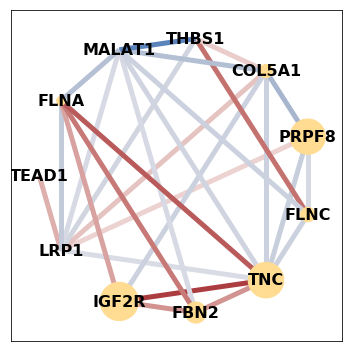

In [223]:
with rc_context({'figure.figsize': (5, 5), 'savefig.dpi': 600, 'figure.frameon':False}):
    nx.draw_networkx(graph_0, pos = pos, width=5, with_labels=True,
                     node_size=size_l, node_color=node_colors, 
                     edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                     font_weight='bold', font_size=16)
    plt.tight_layout()
    plt.savefig(r'..\merfish_data\140gene_example_analysis\networks\patch2 sub markers.png')

### patch 3

In [557]:
graph_0 = nx.Graph()
graph_0.add_nodes_from(sub_markers)

In [558]:
for item1 in sub_markers:
    for item2 in sub_markers:
        if not item1 == item2 and abs(corr_l[3][item1][item2])>1:
            graph_0.add_edge(item1, item2, weight=corr_l[3][item1][item2])

In [559]:
pos = nx.shell_layout(graph_0)

In [560]:
size_l = []
for item in sub_markers:
    size_l.append(z_scores.iloc[3][item]*500)

In [561]:
node_colors = []
for item in corr_l[0].columns.tolist():
    if item=='CONA' or item=='WGA':
        node_colors.append('#925e99dd')
    else:
        node_colors.append('#ffdc91')

In [562]:
edges,weights = zip(*nx.get_edge_attributes(graph_0,'weight').items())

In [563]:
cmap = sns.color_palette('vlag', as_cmap=True)

In [576]:
pos = nx.shell_layout(graph_0)
for k in pos.keys():
    pos[k] = pos[k] * 0.18

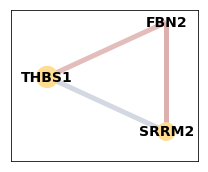

In [580]:
with rc_context({'figure.figsize': (3, 2.5), 'savefig.dpi': 600, 'figure.frameon':False}):
    nx.draw_networkx(graph_0, pos = pos, width=5, with_labels=True,
                     node_size=size_l, node_color=node_colors, 
                     edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                     font_weight='bold', font_size=14)
    plt.tight_layout()
    plt.savefig(r'..\merfish_data\140gene_example_analysis\networks\patch3 sub markers.png')

### patch 6

In [581]:
graph_0 = nx.Graph()
graph_0.add_nodes_from(sub_markers)
for item1 in sub_markers:
    for item2 in sub_markers:
        if not item1 == item2 and abs(corr_l[6][item1][item2])>1:
            graph_0.add_edge(item1, item2, weight=corr_l[6][item1][item2])

In [588]:
pos = nx.shell_layout(graph_0)
for k in pos.keys():
    pos[k] = pos[k] * 0.2

In [589]:
size_l = []
for item in sub_markers:
    size_l.append(z_scores.iloc[3][item]*500)

In [590]:
node_colors = []
for item in corr_l[0].columns.tolist():
    if item=='CONA' or item=='WGA':
        node_colors.append('#925e99dd')
    else:
        node_colors.append('#ffdc91')

In [591]:
edges,weights = zip(*nx.get_edge_attributes(graph_0,'weight').items())

In [592]:
cmap = sns.color_palette('vlag', as_cmap=True)

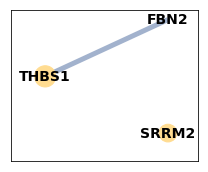

In [595]:
with rc_context({'figure.figsize': (3, 2.5), 'savefig.dpi': 600, 'figure.frameon':False}):
    nx.draw_networkx(graph_0, pos = pos, width=5, with_labels=True,
                     node_size=size_l, node_color=node_colors, 
                     edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                     font_weight='bold', font_size=14)
    plt.tight_layout()
    plt.savefig(r'..\merfish_data\140gene_example_analysis\networks\patch6 sub markers.png')

### patch 20

In [130]:
graph_0 = nx.Graph()
graph_0.add_nodes_from(sub_markers)
for item1 in sub_markers:
    for item2 in sub_markers:
        if not item1 == item2 and abs(corr_l[20][item1][item2])>1:
            graph_0.add_edge(item1, item2, weight=corr_l[20][item1][item2])

In [143]:
pos = nx.shell_layout(graph_0)
for k in pos.keys():
    pos[k] = pos[k] * 0.4

In [144]:
size_l = []
for item in sub_markers:
    size_l.append(z_scores.iloc[20][item]*500)

In [145]:
node_colors = []
for item in corr_l[0].columns.tolist():
    if item=='CONA' or item=='WGA':
        node_colors.append('#925e99dd')
    else:
        node_colors.append('#ffdc91')

In [146]:
edges,weights = zip(*nx.get_edge_attributes(graph_0,'weight').items())

In [147]:
cmap = sns.color_palette('vlag', as_cmap=True)

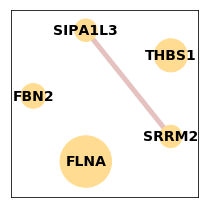

In [150]:
with rc_context({'figure.figsize': (3, 3), 'savefig.dpi': 600, 'figure.frameon':False}):
    nx.draw_networkx(graph_0, pos = pos, width=5, with_labels=True,
                     node_size=size_l, node_color=node_colors, 
                     edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                     font_weight='bold', font_size=14)
    plt.tight_layout()
    plt.savefig(r'..\merfish_data\140gene_example_analysis\networks\patch20 sub markers.png')

## u2os networks

In [635]:
in_dir = r'Y:\coskun-lab\Zhou\4_HCR\2D_analyses_pipelines\merfish_data\bento_u2os\networks\perm_interaction'
corr_l = pd.read_pickle(os.path.join(in_dir, 'u2os_10-46_interactions_10_neighbors.pkl'))

In [636]:
z_in_dir = r'..\merfish_data\bento_u2os\networks\z_scores'
z_scores = pd.read_pickle(os.path.join(z_in_dir, 'merfish_u2os_10-46_cell_patch_z-score.pkl'))

In [637]:
graph_0 = nx.Graph()
graph_0.add_nodes_from(corr_l[0][0].columns.tolist())

In [638]:
for item1 in corr_l[0][0].columns.tolist():
    for item2 in corr_l[0][0].columns.tolist():
        if not item1 == item2 and abs(corr_l[0][0][item1][item2])>2:
            graph_0.add_edge(item1, item2, weight=corr_l[0][0][item1][item2])

In [639]:
pos = nx.spring_layout(graph_0)

In [640]:
z_scores = (z_scores - z_scores.min())+1

In [641]:
size_l = []
for item in corr_l[0][0].columns.tolist():
    size_l.append(z_scores.iloc[0][item]*500)

In [642]:
node_colors = []
for item in corr_l[0][0].columns.tolist():
    if item=='CONA' or item=='WGA':
        node_colors.append('#925e99dd')
    else:
        node_colors.append('#ffdc91')

In [643]:
edges,weights = zip(*nx.get_edge_attributes(graph_0,'weight').items())

In [644]:
cmap = sns.color_palette('vlag', as_cmap=True)

In [645]:
pos = nx.shell_layout(graph_0)
for k in pos.keys():
    pos[k] = pos[k] * 15

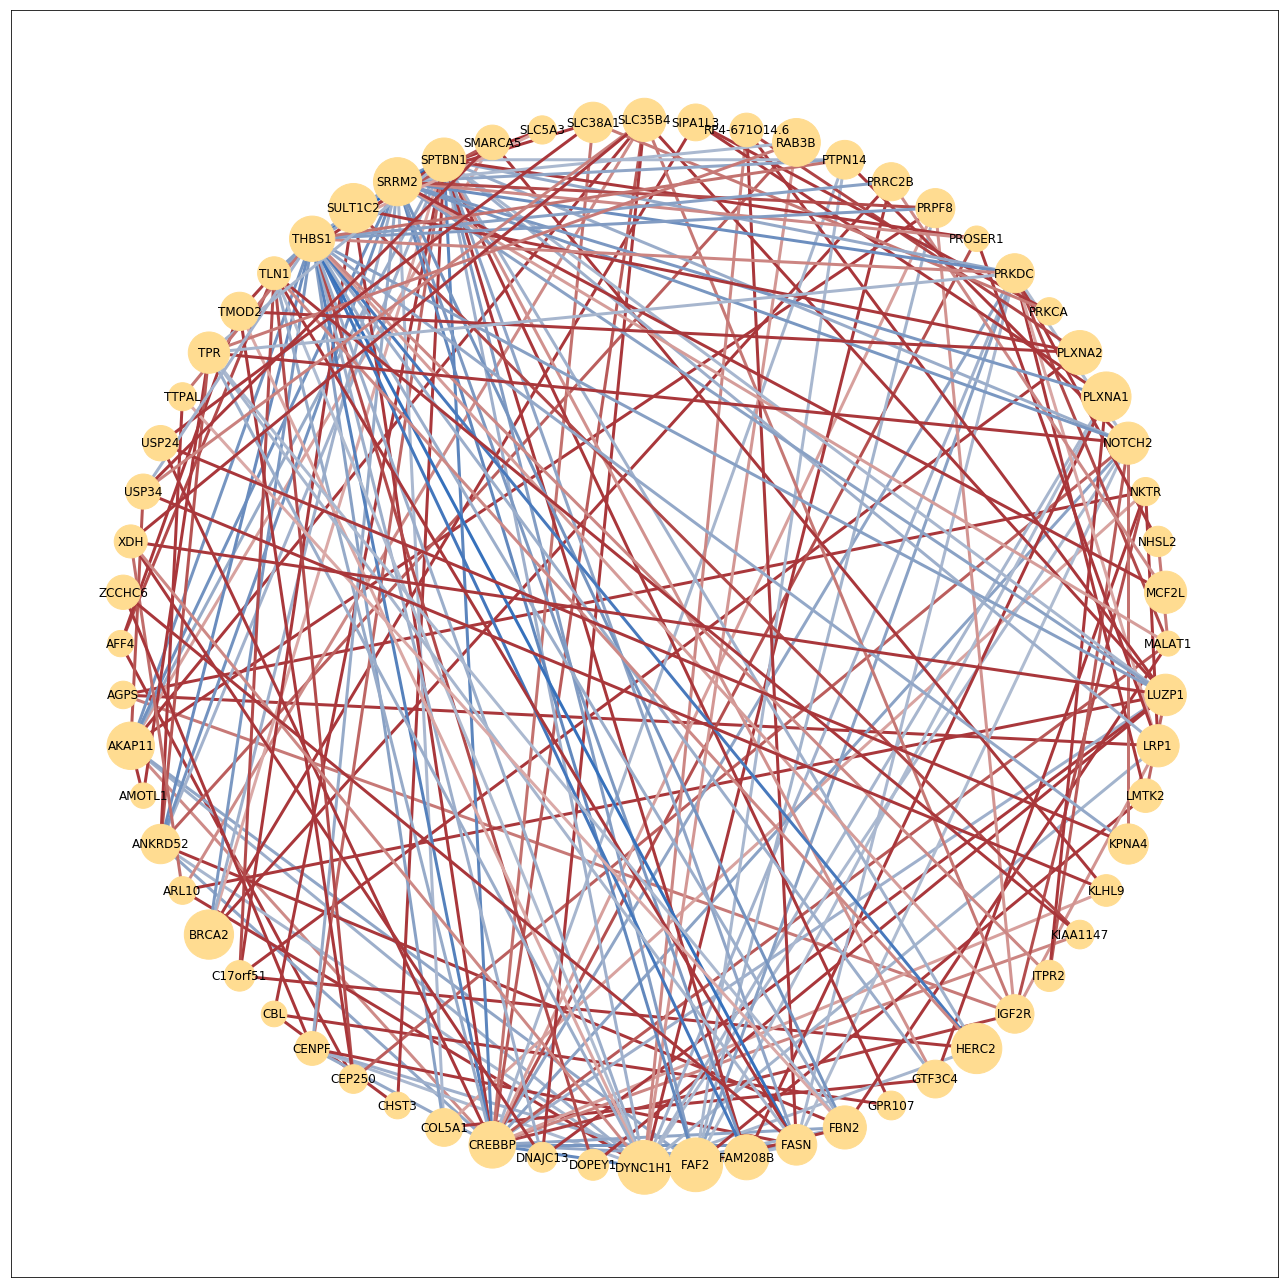

In [646]:
with rc_context({'figure.figsize': (18, 18), 'savefig.dpi': 600}):
    nx.draw_networkx(graph_0, pos = pos, width=3, with_labels=True,
                     node_size=size_l, node_color=node_colors, 
                     edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                     font_weight='normal', font_size=12)
    plt.tight_layout()

In [371]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.6,
                        strongGravityMode=True,
                        gravity=0.0,

                        # Log
                        verbose=True)
pos = forceatlas2.forceatlas2_networkx_layout(graph_0, pos=None, iterations=1)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


In [363]:
for k in pos.keys():
    pos[k] = (pos[k][0]*1.2, pos[k][1]*1.2)

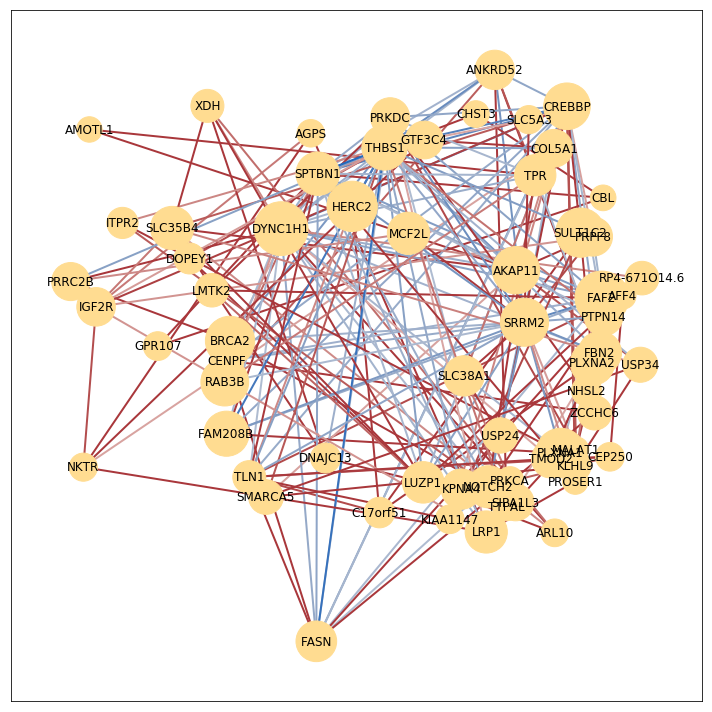

In [372]:
with rc_context({'figure.figsize': (10, 10), 'savefig.dpi': 600}):
    nx.draw_networkx(graph_0, pos = pos, width=2, with_labels=True,
                     node_size=size_l, node_color=node_colors, 
                     edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                     font_weight='normal', font_size=12)
    plt.tight_layout()

In [647]:
sub_markers = ['THBS1','SRRM2','FBN2']

### Patch 3

In [648]:
graph_0 = nx.Graph()
graph_0.add_nodes_from(sub_markers)

In [655]:
for item1 in sub_markers:
    for item2 in sub_markers:
        if not item1 == item2:
            graph_0.add_edge(item1, item2, weight=corr_l[3][0][item1][item2])

In [657]:
size_l = []
for item in sub_markers:
    size_l.append(z_scores.iloc[3][item]*500)

In [658]:
node_colors = []
for item in corr_l[3][0].columns.tolist():
    if item=='CONA' or item=='WGA':
        node_colors.append('#925e99dd')
    else:
        node_colors.append('#ffdc91')

In [659]:
edges,weights = zip(*nx.get_edge_attributes(graph_0,'weight').items())

In [660]:
cmap = sns.color_palette('vlag', as_cmap=True)

In [668]:
pos = nx.shell_layout(graph_0)
for k in pos.keys():
    pos[k] = pos[k] * 0.22

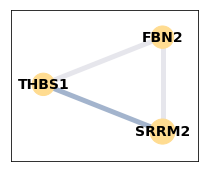

In [670]:
with rc_context({'figure.figsize': (3, 2.5), 'savefig.dpi': 600, 'figure.frameon':False}):
    nx.draw_networkx(graph_0, pos = pos, width=5, with_labels=True,
                     node_size=size_l, node_color=node_colors, 
                     edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                     font_weight='bold', font_size=14)
    plt.tight_layout()
    plt.savefig(r'.\figures\u2os patch3 network.png')

### Patch 15

In [688]:
graph_0 = nx.Graph()
graph_0.add_nodes_from(sub_markers)

In [689]:
for item1 in sub_markers:
    for item2 in sub_markers:
        if not item1 == item2:
            graph_0.add_edge(item1, item2, weight=corr_l[15][0][item1][item2])

In [690]:
size_l = []
for item in sub_markers:
    size_l.append(z_scores.iloc[15][item]*500)

In [691]:
node_colors = []
for item in corr_l[15][0].columns.tolist():
    if item=='CONA' or item=='WGA':
        node_colors.append('#925e99dd')
    else:
        node_colors.append('#ffdc91')

In [692]:
edges,weights = zip(*nx.get_edge_attributes(graph_0,'weight').items())

In [693]:
cmap = sns.color_palette('vlag', as_cmap=True)

In [694]:
pos = nx.shell_layout(graph_0)
for k in pos.keys():
    pos[k] = pos[k] * 0.22

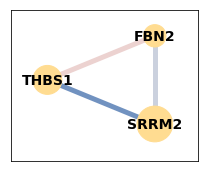

In [696]:
with rc_context({'figure.figsize': (3, 2.5), 'savefig.dpi': 600, 'figure.frameon':False}):
    nx.draw_networkx(graph_0, pos = pos, width=5, with_labels=True,
                     node_size=size_l, node_color=node_colors, 
                     edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                     font_weight='bold', font_size=14)
    plt.tight_layout()
    plt.savefig(r'.\figures\u2os patch15 network.png')

# Single cell, multi patches networks

In [2]:
# Read correlation list
in_dir = r'..\merfish_data\140gene_example_analysis\gene_num_networks\permutation'
corr_l = pd.read_pickle(os.path.join(in_dir, '50gene_network.pkl'))

In [3]:
# Read z-score list
z_in_dir = r'..\merfish_data\140gene_example_analysis\gene_num_networks\z_score'
z_scores = pd.read_pickle(os.path.join(z_in_dir, '50gene_z_scores.pkl'))

In [12]:
out_dir = r'..\merfish_data\140gene_example_analysis\gene_num_networks\networks'
out_fn_l = os.listdir(out_dir)
out_fn_l.sort()
corr_fn_l = os.listdir(in_dir)
corr_fn_l.sort()
z_fn_l = os.listdir(z_in_dir)
z_fn_l.sort()

In [13]:
graph = nx.Graph()
cmap = sns.color_palette('vlag', as_cmap=True)
for i in range(len(corr_fn_l)):
    corr_l = pd.read_pickle(os.path.join(in_dir, corr_fn_l[i]))
    z_scores = pd.read_pickle(os.path.join(z_in_dir, z_fn_l[i]))
    splits = corr_fn_l[i].split('_')
    cell_name = splits[0] + '_'
    for j in range(len(corr_l)):
        corr = corr_l[j][0]
        if corr is None:
            continue
        graph.clear()

        # Add nodes
        graph.add_nodes_from(corr.columns.tolist())

        # Add edges
        for item1 in corr.columns.tolist():
            for item2 in corr.columns.tolist():
                if not item1 == item2 and abs(corr[item1][item2])>1.5:
                    graph.add_edge(item1, item2, weight=corr[item1][item2])
        
        # Position of node
        pos = nx.shell_layout(graph)
        for k in pos.keys():
            pos[k] = pos[k] * 0.6
        
        # Size of nodes
        size_l = []
        for item in corr.columns.tolist():
            size_l.append(z_scores.iloc[j][item]*1000)

        # Node colors
        node_colors = []
        for item in corr.columns.tolist():
            if item=='CONA' or item=='WGA':
                node_colors.append('#925e99dd')
            else:
                node_colors.append('#ffdc91')

        # Edge colors
        edges,weights = zip(*nx.get_edge_attributes(graph,'weight').items())

        with rc_context({'figure.figsize': (10, 10), 'savefig.dpi': 600}):
            nx.draw_networkx(graph, pos = pos, width=5, with_labels=True,
                             node_size=size_l, node_color=node_colors, 
                             edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                             font_weight='normal', font_size=12)
        plt.tight_layout()
        plt.savefig(os.path.join(out_dir,out_fn_l[i],cell_name+'_patch_'+str(j)+'.png'))
        plt.clf()

C:\Users\zfang38\Anaconda3\envs\network\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\zfang38\Anaconda3\envs\network\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 720x720 with 0 Axes>